This is a rough notebook to explore the data and check for any issues loading the data

In [1]:
import pandas as pd

In [2]:
pd.set_option('max_colwidth', 500)

## load the data

In [3]:
data_path = 'data/dataset.csv'

In [4]:
df = pd.read_csv(data_path, header=None)
df.columns = ['dataset', 'text', 'target']

In [5]:
print(f'{len(df):,} rows')

7,144 rows


## spot check the the text

In [6]:
df.head()

,dataset,text,target
0,TRAIN,G.E.M.S Starting a nonprofit organization in the dmv area called G.E.M.S. Coming in 2019 G.E.M.S: Is a nonprofit We are Young Mothers who are working to help mentor and empower young mother / parents and overall youth in our community. We are Young Parents that’s helping our youth through all struggles trails & tribulation to better themselves. •We are here to help those young single moms /parents over come the fear of being young and alone while pregnant •We are here to help youth who need ...,spam
1,TRAIN,"Online Shopping w/ AVON Hello Mommas 😘😘♥️ If you love makeup, clothing, jewelry, shopping & more, Visit my online Avon website!! Make sure to select direct delivery at check out! Message me if you have any questions 💖😘 Shop On! The Link is in the comment below 👇👇👇 O % 19% l Sprint LTE 12:19 AM jovenisse.avonrepresentative.com AVON JOVENISSE REYNOSO Contact Me Shop Now FREE DIRECT DELIVERY with your $40 order NEW COLLECTION SEASIDE GARDENS Sunny days spent in all-American fashion Shop My Stor...",spam
2,TRAIN,"Shop w/ AVON Hello Strong Mommas 😘♥️ If you love makeup, clothing, jewelry, shopping and more, visit my online AVON website!! Choose direct delivery at checkout and feel free to message me with any questions! Many blessings! Click on the link below! 👇👇👇 O % 19% l Sprint LTE 12:19 AM jovenisse.avonrepresentative.com AVON JOVENISSE REYNOSO Contact Me Shop Now FREE DIRECT DELIVERY with your $40 order NEW COLLECTION SEASIDE GARDENS Sunny days spent in all-American fashion Shop My Store» My name ...",spam
3,TRAIN,"Shopping If anyone is into make or jewelry or clothing, send me a message or shop on my online website through AVON. LINK IN THE COMMENT BELOW 👇😘 let PRING TOP TRENDS FOR Campaign 8 Go Wild! Animal-Print Swing Top best-selling Swing Top is back in a cool animal print. Button-front Polyester. Machine wash, line dry Imported. Center back length: 26"" on medium. S(6-8) 271-262 M(10-12) 2781 W .99 CAMPAIGN 8 XL(18) 271-296 Orig. Price $24.99 Center back length: 28"" on 1X. 1X(18W-20W) 271-300 2X(2...",spam
4,TEST,Make money from home... http://letty1995.hotsystem.com/main.php check que page and learn more have questions... inbot me THE AMBIT Earn More OPPORTUNITY Promote and REGIONAL CONSULTANT SENIOR EXECUTIVE NATIONAL CONSULTANT CONSULTANT CONSULTANT YOU +$55 +$80 $80 $25 $315 $235 $340 $155 $100 $100 $100 $100 $100 $100 $100 $100 UP TO UP TO UP TO $135 $215 $55 $240 UNLIMITED LEVELS UNLIMITED LEVELS UNLIMITED LEVELS UNLIMITED LEVELS,spam


In [8]:
# df

## get the break down of spam and ham by dataset type

In [9]:
df_counts = df.groupby(['dataset', 'target']).text.count().reset_index()

df_counts['total'] = df_counts.groupby('dataset').text.transform(sum)

df_counts['pct'] = df_counts.text / df_counts.total

df_counts

,dataset,target,text,total,pct
0,TEST,ham,402,1443,0.278586
1,TEST,spam,1041,1443,0.721414
2,TRAIN,ham,1296,5015,0.258425
3,TRAIN,spam,3719,5015,0.741575
4,VALIDATION,ham,200,686,0.291545
5,VALIDATION,spam,486,686,0.708455


In [10]:
train_text = df.loc[df.dataset=='TRAIN'].text.values
f'{len(train_text):,} training posts'

'5,015 training posts'

In [11]:
train_text[0]

'G.E.M.S Starting a nonprofit organization in the dmv area called G.E.M.S. Coming in 2019 G.E.M.S: Is a nonprofit We are Young Mothers who are working to help mentor and empower young mother / parents and overall youth in our community. We are Young Parents that’s helping our youth through all struggles trails & tribulation to better themselves. •We are here to help those young single moms /parents over come the fear of being young and alone while pregnant •We are here to help youth who need someone around here around their age to help with there self esteem And much more Once we get established better we will help our community youth ages 12-24... https://m.facebook.com/groups/454791148285085 #GEMS💎 Follow us on Twitter @gemselite2 And coming soon to instagram And many more will keep you updated QUEENDOM gtbs feei '

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [13]:
stop_words = set(stopwords.words('english')) 

In [14]:
word_frequency = Counter()
doc_frequency = Counter()

for t in train_text:
    
    words = word_tokenize(t.lower())
    
#     words = [w for w in words if w not in stop_words]
    
    word_frequency.update(words)
    doc_frequency.update(set(words))

    

In [15]:
len(word_frequency)

28226

In [16]:
# word_frequency

In [17]:
# doc_frequency

In [19]:
word_frequency.most_common(30)

[('.', 11927),
 ('i', 11541),
 ('to', 10593),
 ('and', 9633),
 (',', 9010),
 ('!', 8713),
 ('a', 8091),
 ('the', 6458),
 ('for', 5817),
 ('you', 5551),
 ('’', 5414),
 ('my', 4451),
 ('in', 4012),
 ('of', 3944),
 ('it', 3268),
 ('is', 3199),
 ('?', 3197),
 ('me', 3140),
 ('with', 2937),
 ('have', 2908),
 ('if', 2661),
 (':', 2556),
 ('on', 2498),
 ('or', 2341),
 ('your', 2320),
 ('this', 2189),
 ('$', 2137),
 ('be', 2089),
 ('that', 2010),
 (')', 1894)]

In [20]:
# word_frequency.most_common()[:-500-1:-1]

In [21]:
# doc_frequency.most_common()

In [22]:
import seaborn as sns

In [23]:
word_df = pd.DataFrame(data={'word':list(word_frequency.keys()), 'frequency':list(word_frequency.values())})

In [24]:
# word_df.frequency.value_counts()[:30]

## distribution of word frequencies

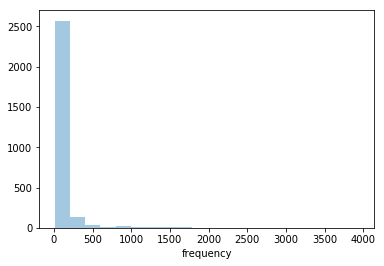

In [25]:
sns.distplot(word_df.loc[(word_df.frequency>10)&(word_df.frequency<4000)].frequency, bins=20, kde=False)

In [26]:
# count of numeric words
len([w for w in word_frequency.keys() if w.isnumeric()])

855

## distribution of post lengths

In [27]:
df['text_length'] = df.text.str.len()

In [28]:
df.head()

,dataset,text,target,text_length
0,TRAIN,G.E.M.S Starting a nonprofit organization in the dmv area called G.E.M.S. Coming in 2019 G.E.M.S: Is a nonprofit We are Young Mothers who are working to help mentor and empower young mother / parents and overall youth in our community. We are Young Parents that’s helping our youth through all struggles trails & tribulation to better themselves. •We are here to help those young single moms /parents over come the fear of being young and alone while pregnant •We are here to help youth who need ...,spam,826
1,TRAIN,"Online Shopping w/ AVON Hello Mommas 😘😘♥️ If you love makeup, clothing, jewelry, shopping & more, Visit my online Avon website!! Make sure to select direct delivery at check out! Message me if you have any questions 💖😘 Shop On! The Link is in the comment below 👇👇👇 O % 19% l Sprint LTE 12:19 AM jovenisse.avonrepresentative.com AVON JOVENISSE REYNOSO Contact Me Shop Now FREE DIRECT DELIVERY with your $40 order NEW COLLECTION SEASIDE GARDENS Sunny days spent in all-American fashion Shop My Stor...",spam,824
2,TRAIN,"Shop w/ AVON Hello Strong Mommas 😘♥️ If you love makeup, clothing, jewelry, shopping and more, visit my online AVON website!! Choose direct delivery at checkout and feel free to message me with any questions! Many blessings! Click on the link below! 👇👇👇 O % 19% l Sprint LTE 12:19 AM jovenisse.avonrepresentative.com AVON JOVENISSE REYNOSO Contact Me Shop Now FREE DIRECT DELIVERY with your $40 order NEW COLLECTION SEASIDE GARDENS Sunny days spent in all-American fashion Shop My Store» My name ...",spam,813
3,TRAIN,"Shopping If anyone is into make or jewelry or clothing, send me a message or shop on my online website through AVON. LINK IN THE COMMENT BELOW 👇😘 let PRING TOP TRENDS FOR Campaign 8 Go Wild! Animal-Print Swing Top best-selling Swing Top is back in a cool animal print. Button-front Polyester. Machine wash, line dry Imported. Center back length: 26"" on medium. S(6-8) 271-262 M(10-12) 2781 W .99 CAMPAIGN 8 XL(18) 271-296 Orig. Price $24.99 Center back length: 28"" on 1X. 1X(18W-20W) 271-300 2X(2...",spam,628
4,TEST,Make money from home... http://letty1995.hotsystem.com/main.php check que page and learn more have questions... inbot me THE AMBIT Earn More OPPORTUNITY Promote and REGIONAL CONSULTANT SENIOR EXECUTIVE NATIONAL CONSULTANT CONSULTANT CONSULTANT YOU +$55 +$80 $80 $25 $315 $235 $340 $155 $100 $100 $100 $100 $100 $100 $100 $100 UP TO UP TO UP TO $135 $215 $55 $240 UNLIMITED LEVELS UNLIMITED LEVELS UNLIMITED LEVELS UNLIMITED LEVELS,spam,431


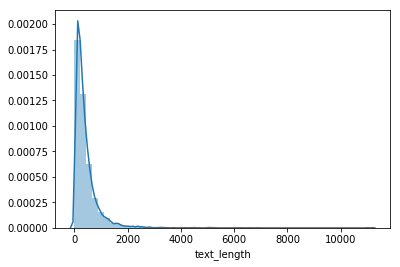

In [29]:
sns.distplot(df.text_length)

In [ ]:
df.text_length.describe()